In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set style
sns.set(style="whitegrid")

# Load data
data = pd.read_csv("CREMP_OCTO_RawData_2023.csv")

In [5]:
data.head()

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,SPP_Code,sciName,Height_cm
0,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,9.0
1,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,54.0
2,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,12.0
3,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,11.0
4,2011,6/8/2011,UK,P,32,Porter Patch,321,PAME,Pseudopterogorgia americana,11.0


In [7]:
# Convert date
data["Date"] = pd.to_datetime(data["Date"])

In [9]:
# -----------------------------
# 🧼 Basic Overview
# -----------------------------
print(data.info())
print("\nPreview:")
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109246 entries, 0 to 109245
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Year       109246 non-null  int64         
 1   Date       109246 non-null  datetime64[ns]
 2   Subregion  109246 non-null  object        
 3   Habitat    109246 non-null  object        
 4   SiteID     109246 non-null  int64         
 5   Site_name  109246 non-null  object        
 6   StationID  109246 non-null  int64         
 7   SPP_Code   109246 non-null  object        
 8   sciName    109246 non-null  object        
 9   Height_cm  109244 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.3+ MB
None

Preview:
   Year       Date Subregion Habitat  SiteID     Site_name  StationID  \
0  2011 2011-06-08        UK       P      32  Porter Patch        321   
1  2011 2011-06-08        UK       P      32  Porter Patch        321  

In [11]:
# -----------------------------
# 🔍 Distribution of Categorical Features
# -----------------------------
cat_cols = ["Subregion", "Habitat", "Site_name", "sciName"]
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())


Subregion value counts:
Subregion
MK    46903
UK    35769
LK    26574
Name: count, dtype: int64

Habitat value counts:
Habitat
OD    41184
OS    36024
P     32038
Name: count, dtype: int64

Site_name value counts:
Site_name
Admiral                  10855
Alligator Shallow        10043
Tennessee Shallow         8658
Sand Key Deep             8227
Carysfort Deep            6551
Molasses Deep             6276
Western Sambo Deep        5957
Porter Patch              5759
Alligator Deep            5426
Dustan Rocks              5232
Tennessee Deep            4755
West Turtle Shoal         4550
Sombrero Shallow          4247
Carysfort Shallow         4200
Sombrero Deep             3992
Sand Key Shallow          3863
Cliff Green               2903
Western Sambo Shallow     2885
Molasses Shallow          2128
West Washer Women         1738
Red Dun Reef              1001
Name: count, dtype: int64

sciName value counts:
sciName
Pseudopterogorgia americana    50883
Gorgonia ventalina            


--- Numeric Summary ---
                Year         SiteID      StationID      Height_cm
count  109246.000000  109246.000000  109246.000000  109244.000000
mean     2017.591271      56.487762     567.443037      19.349914
std         3.639189      17.298813     172.985953      17.642004
min      2011.000000      26.000000     261.000000       1.000000
25%      2015.000000      35.000000     354.000000       6.000000
50%      2018.000000      55.000000     554.000000      14.000000
75%      2021.000000      74.000000     741.000000      28.000000
max      2023.000000      81.000000     814.000000     165.000000


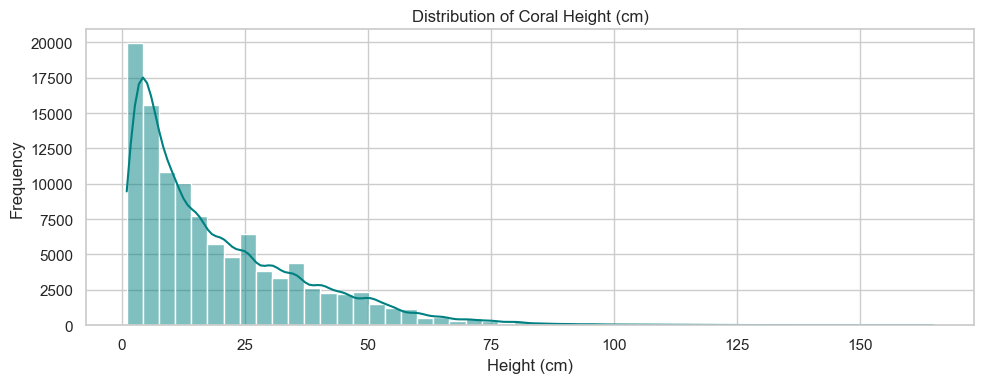

In [27]:
# === Numeric Columns Summary ===
numeric_cols = ["Year", "SiteID", "StationID", "Height_cm"]
print("\n--- Numeric Summary ---")
print(data[numeric_cols].describe())

# Plot distribution of coral height
plt.figure(figsize=(10, 4))
sns.histplot(data["Height_cm"].dropna(), bins=50, kde=True, color="teal")
plt.title("Distribution of Coral Height (cm)")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

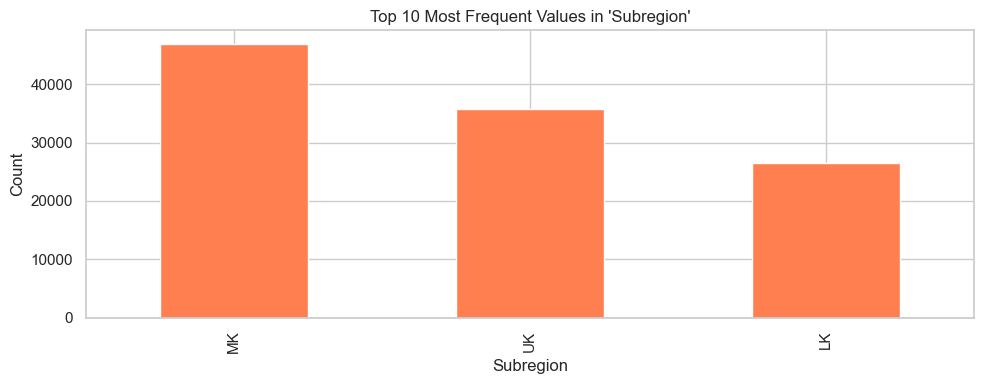

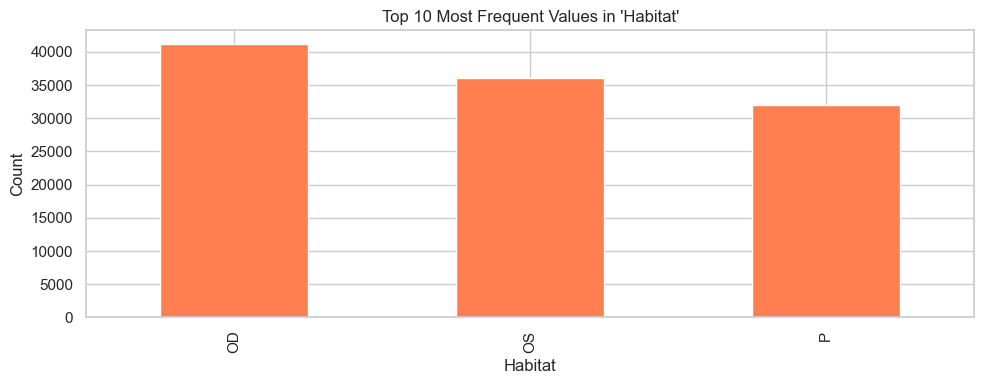

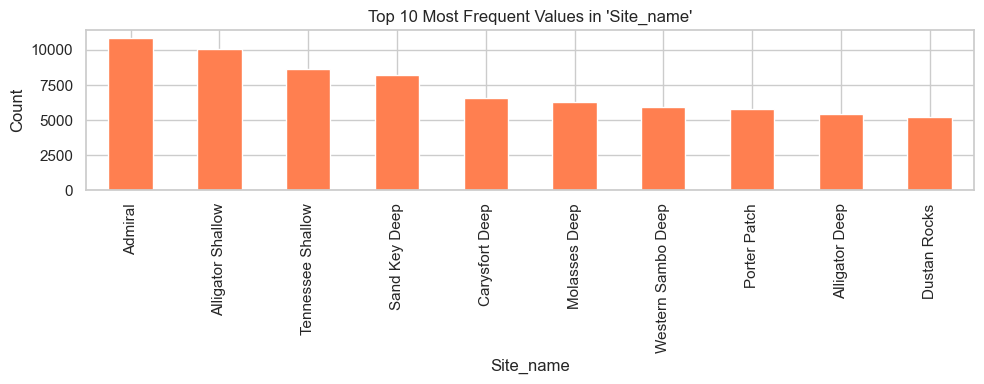

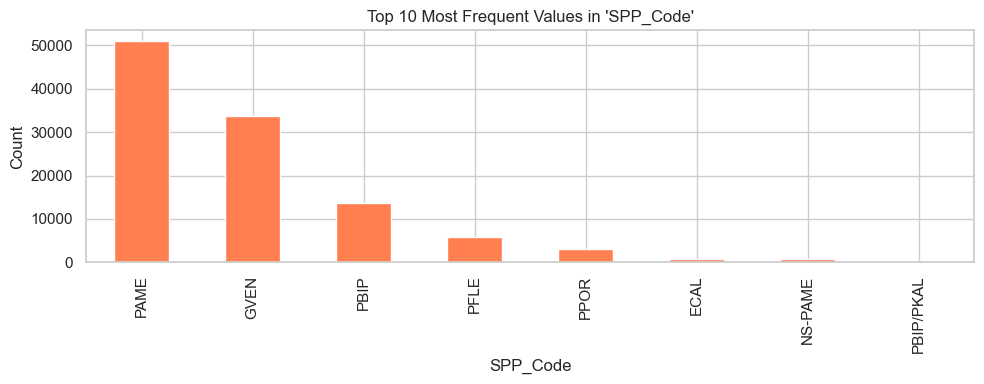

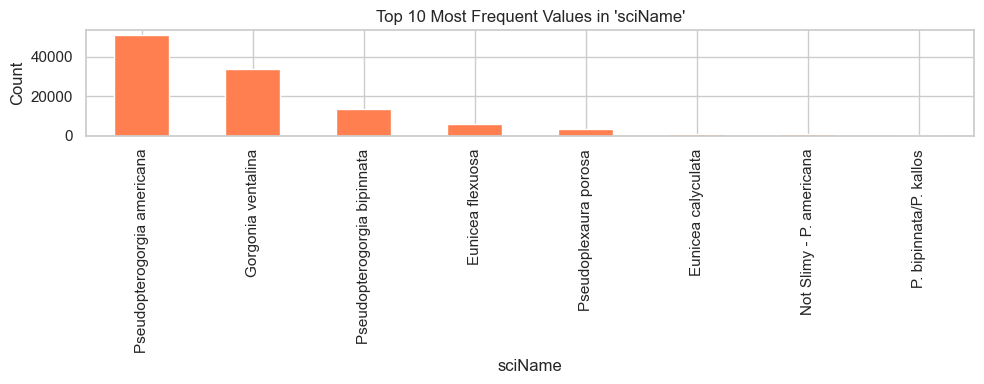

In [29]:
# === Categorical Columns Distribution ===
categorical_cols = ["Subregion", "Habitat", "Site_name", "SPP_Code", "sciName"]
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    data[col].value_counts().head(10).plot(kind="bar", color="coral")
    plt.title(f"Top 10 Most Frequent Values in '{col}'")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

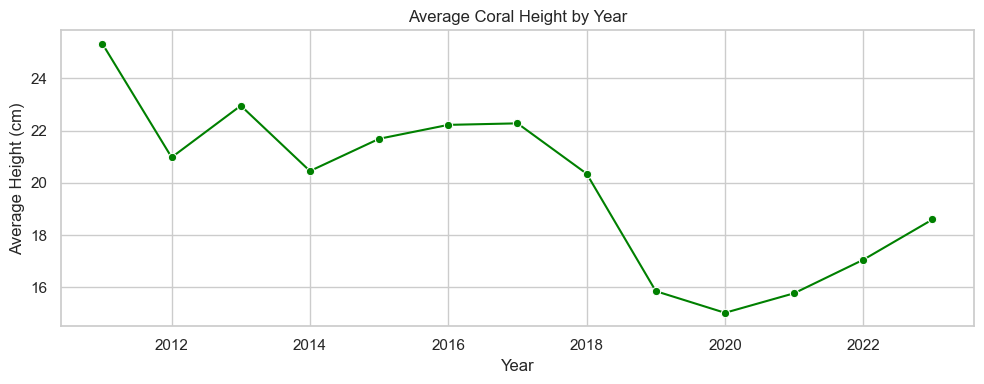

In [31]:
# ===  Average Coral Height by Year ===
avg_by_year = data.groupby("Year")["Height_cm"].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=avg_by_year.index, y=avg_by_year.values, marker="o", color="green")
plt.title("Average Coral Height by Year")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.tight_layout()
plt.show()

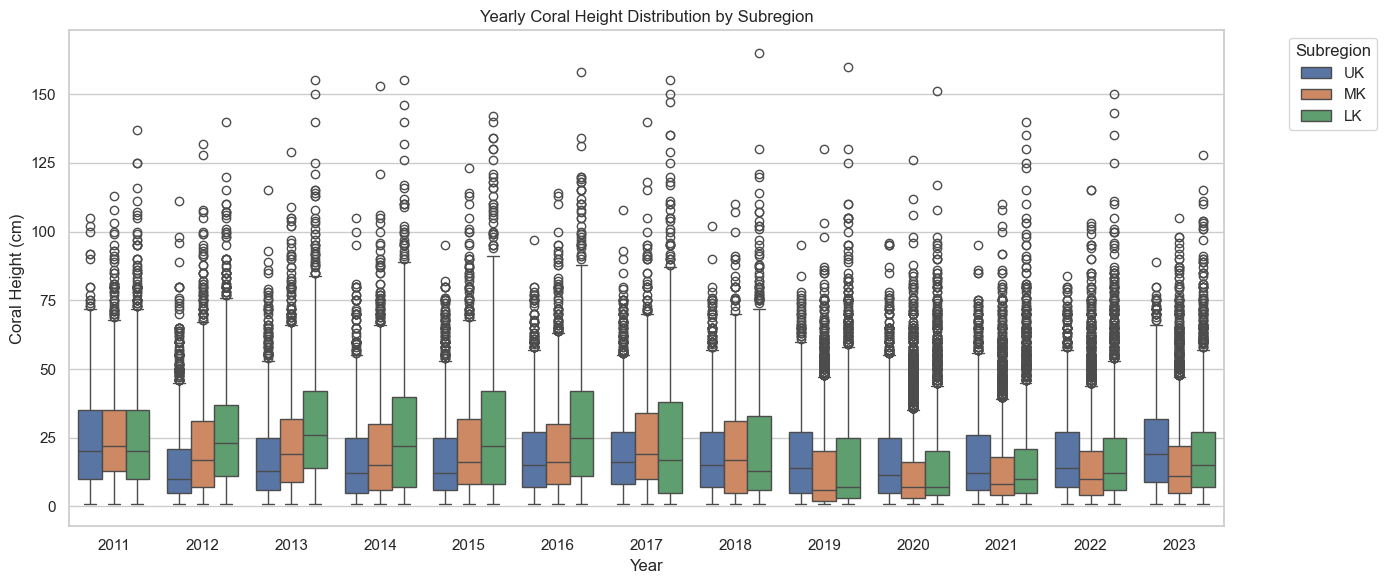

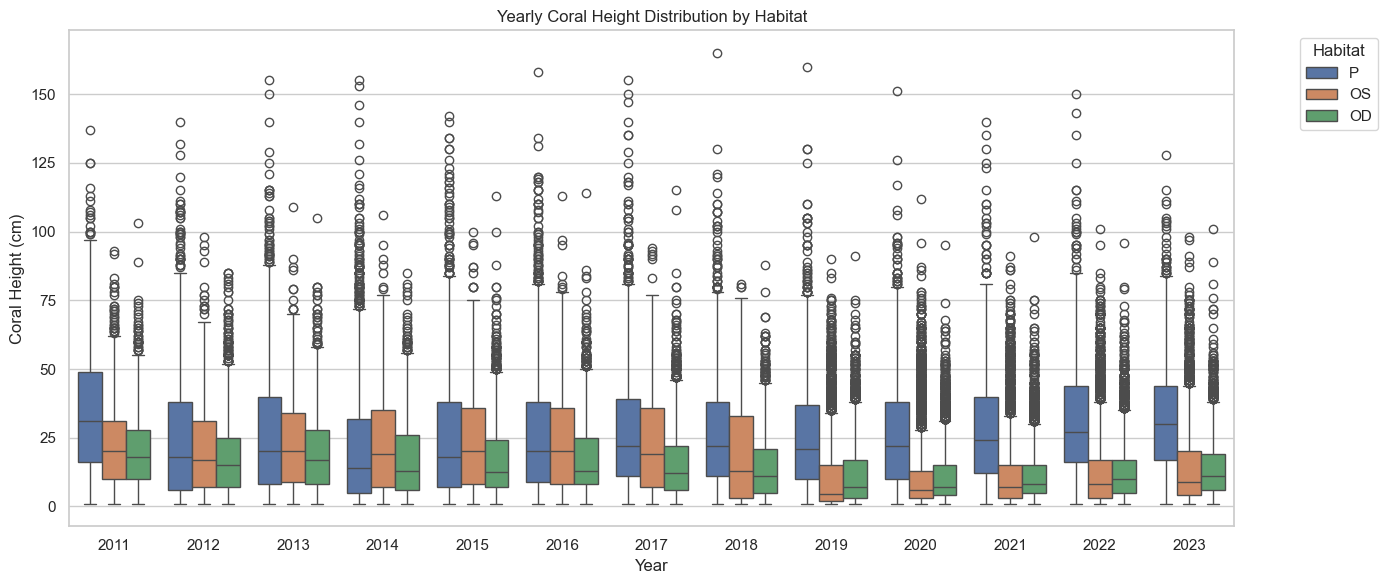

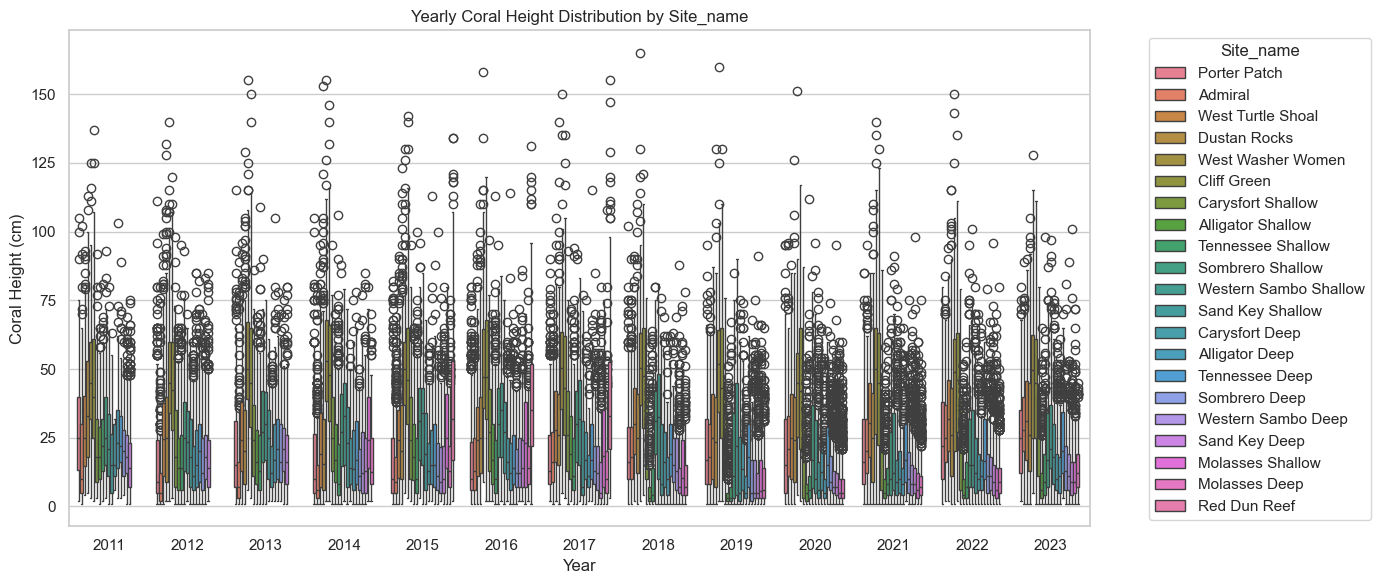

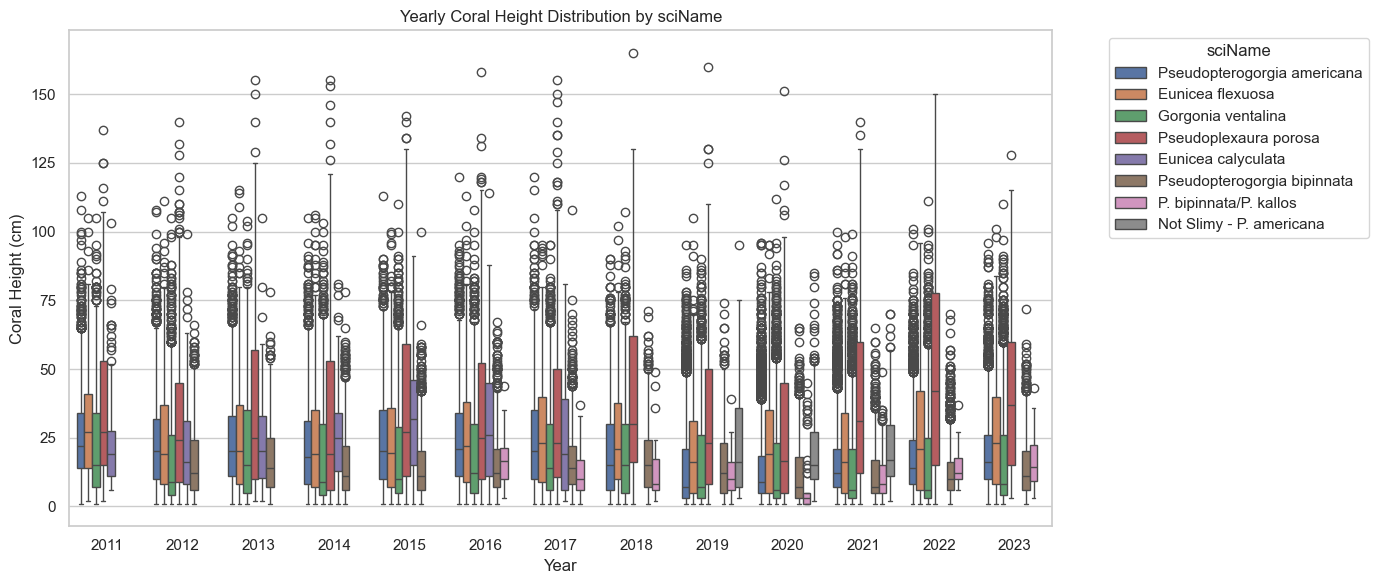

In [33]:
# Set seaborn style
sns.set(style="whitegrid")

# Function to plot boxplots by category and year
def plot_yearly_boxplots(category, data):
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=data, x="Year", y="Height_cm", hue=category)
    plt.title(f"Yearly Coral Height Distribution by {category}")
    plt.xlabel("Year")
    plt.ylabel("Coral Height (cm)")
    plt.legend(title=category, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Only include rows with non-null Height_cm and proper datetime
filtered = data.dropna(subset=["Height_cm", "Year"])

# Plot by each key categorical variable
plot_yearly_boxplots("Subregion", filtered)
plot_yearly_boxplots("Habitat", filtered)
plot_yearly_boxplots("Site_name", filtered)
plot_yearly_boxplots("sciName", filtered)

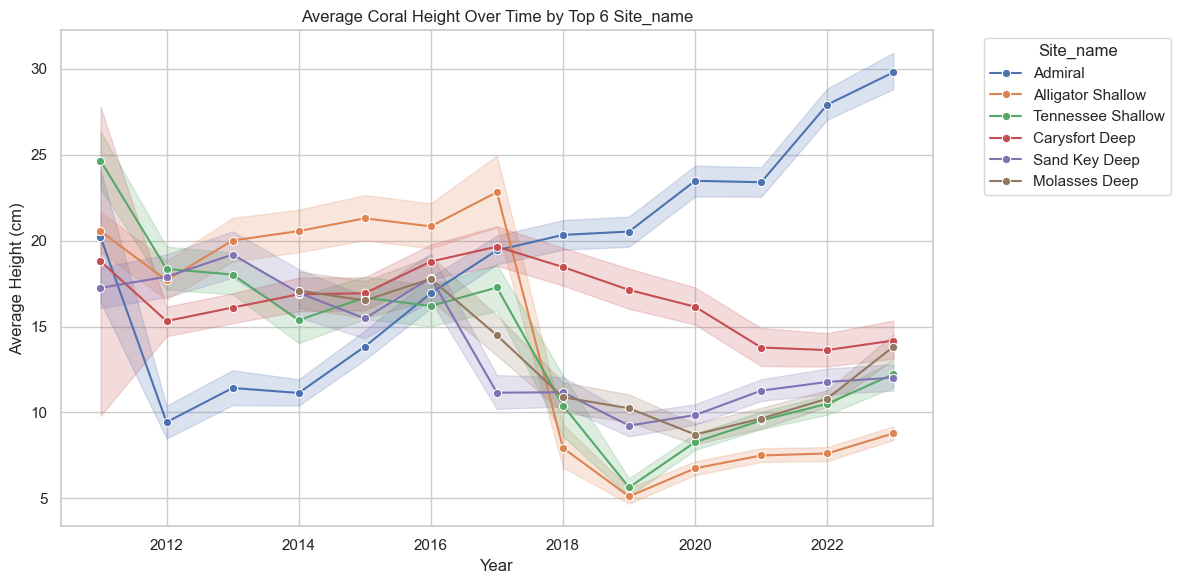

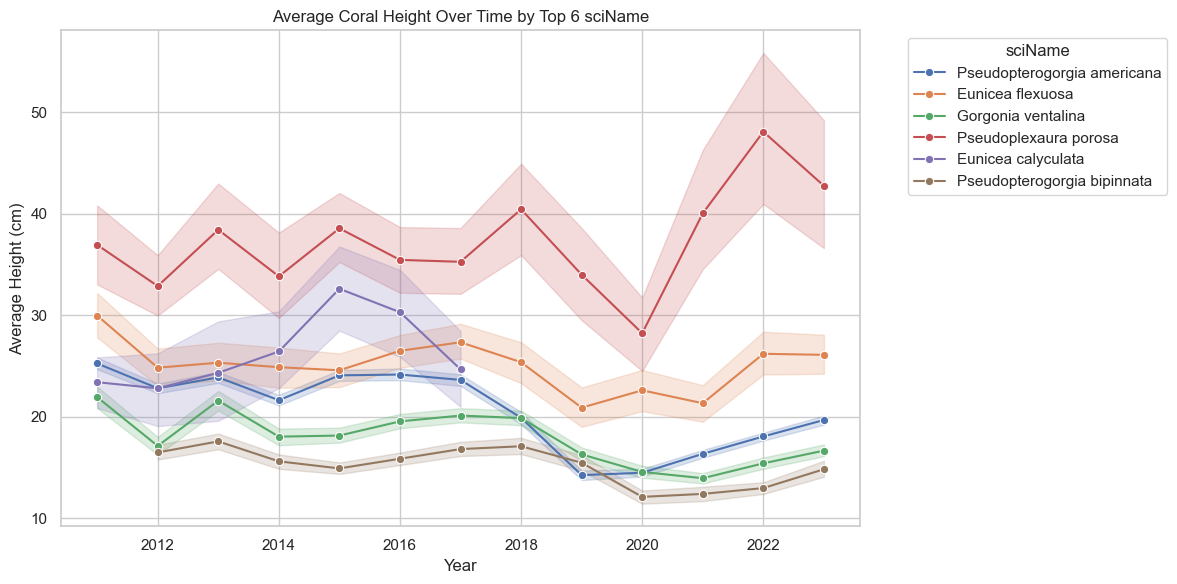

In [35]:
# Helper: Plot yearly trends for top N categories
def plot_yearly_avg_by_category(data, category, top_n=6):
    top_categories = data[category].value_counts().head(top_n).index
    filtered = data[data[category].isin(top_categories)]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered, x="Year", y="Height_cm", hue=category, marker="o")
    plt.title(f"Average Coral Height Over Time by Top {top_n} {category}")
    plt.xlabel("Year")
    plt.ylabel("Average Height (cm)")
    plt.legend(title=category, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Apply to top sites and species
plot_yearly_avg_by_category(data, "Site_name", top_n=6)
plot_yearly_avg_by_category(data, "sciName", top_n=6)

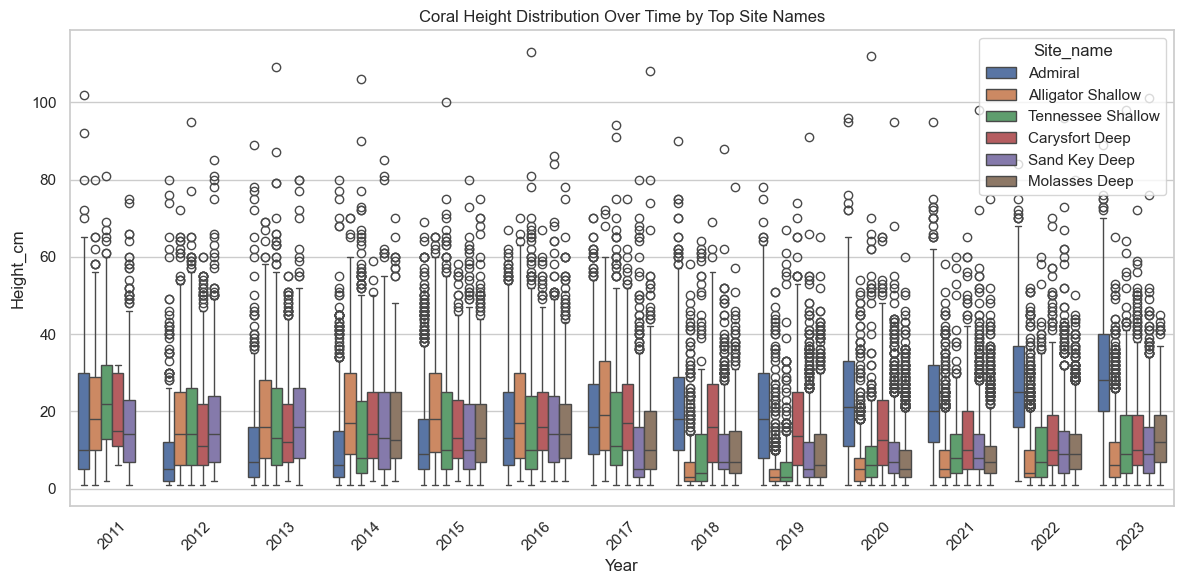

In [15]:
# -----------------------------
# 📉 Top Site Names: Coral Height Over Time
# -----------------------------
top_sites = data["Site_name"].value_counts().head(6).index
top_sites_data = data[data["Site_name"].isin(top_sites)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_sites_data, x="Year", y="Height_cm", hue="Site_name")
plt.title("Coral Height Distribution Over Time by Top Site Names")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

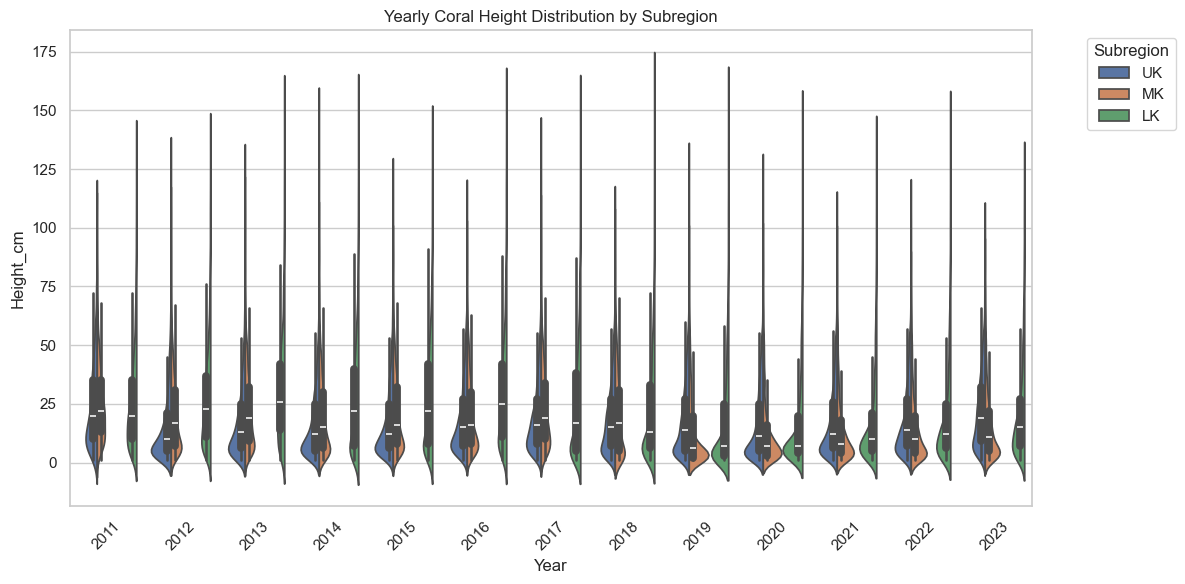

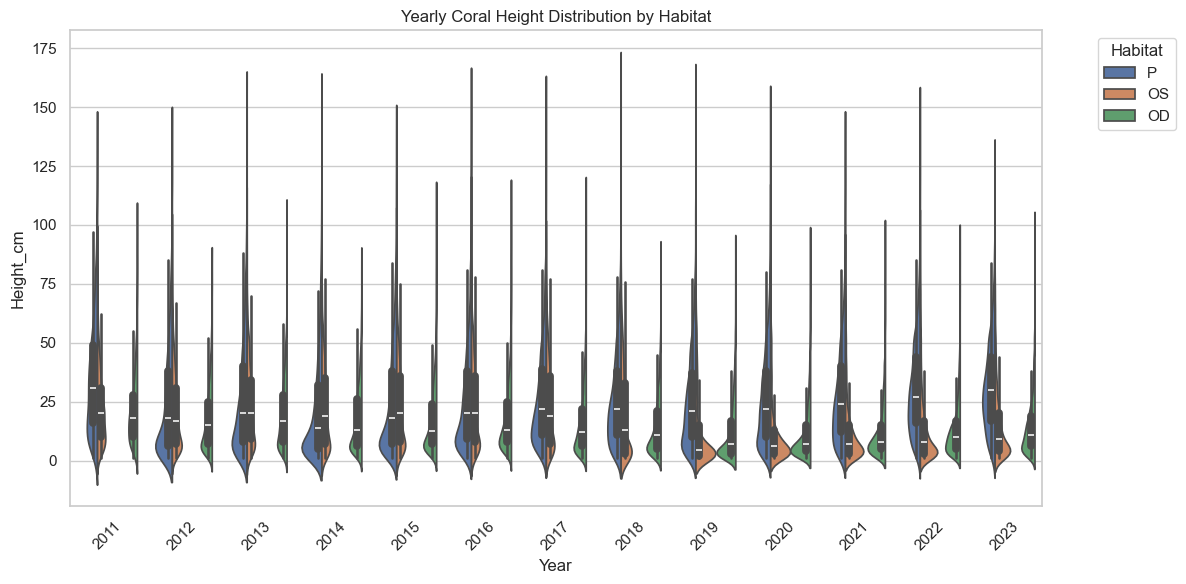

In [13]:
# -----------------------------
# 📊 Yearly Coral Height Distribution by Category
# -----------------------------
def plot_yearly_violin(col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=data, x="Year", y="Height_cm", hue=col, split=True)
    plt.title(f"Yearly Coral Height Distribution by {col}")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=col)
    plt.tight_layout()
    plt.show()

plot_yearly_violin("Subregion")
plot_yearly_violin("Habitat")

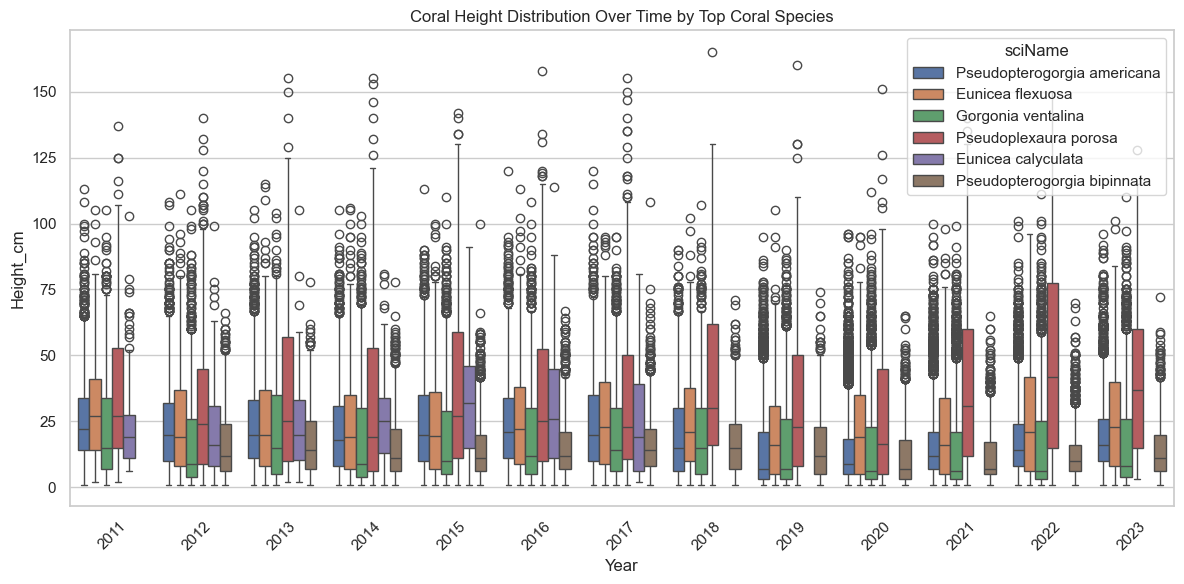

In [19]:
# -----------------------------
# 🌱 Top Coral Species: Coral Height Over Time
# -----------------------------
top_species = data["sciName"].value_counts().head(6).index
top_species_data = data[data["sciName"].isin(top_species)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_species_data, x="Year", y="Height_cm", hue="sciName")
plt.title("Coral Height Distribution Over Time by Top Coral Species")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

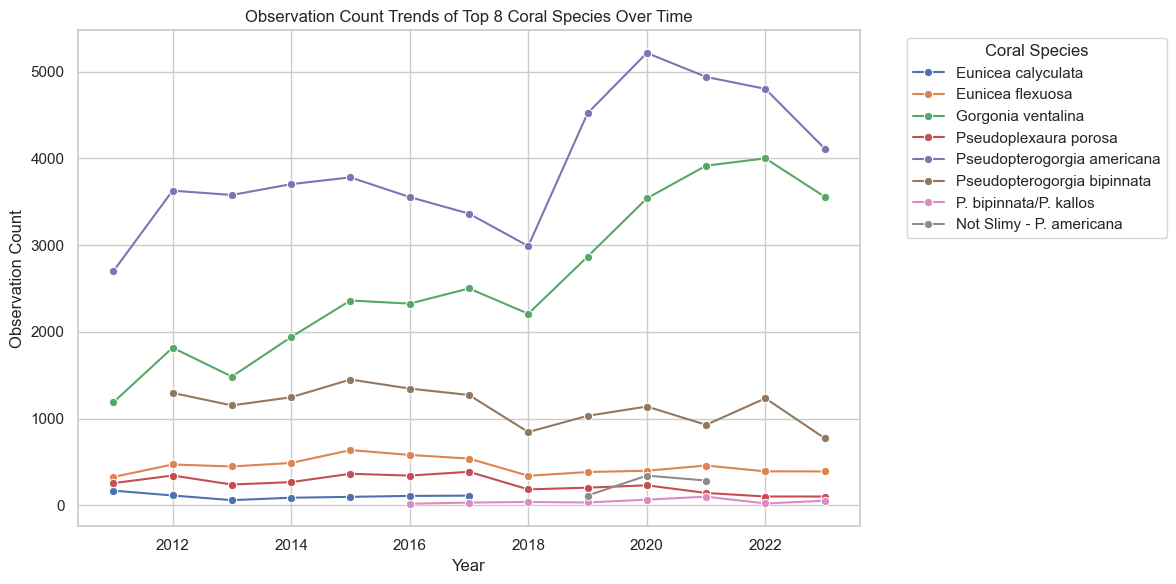

In [21]:
# -----------------------------
# 🌈 Species Trends Over Time
# -----------------------------
top_n = 8
top_species = data["sciName"].value_counts().head(top_n).index
filtered = data[data["sciName"].isin(top_species)]
species_trend = filtered.groupby(["Year", "sciName"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=species_trend, x="Year", y="count", hue="sciName", marker="o")
plt.title(f"Observation Count Trends of Top {top_n} Coral Species Over Time")
plt.xlabel("Year")
plt.ylabel("Observation Count")
plt.legend(title="Coral Species", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

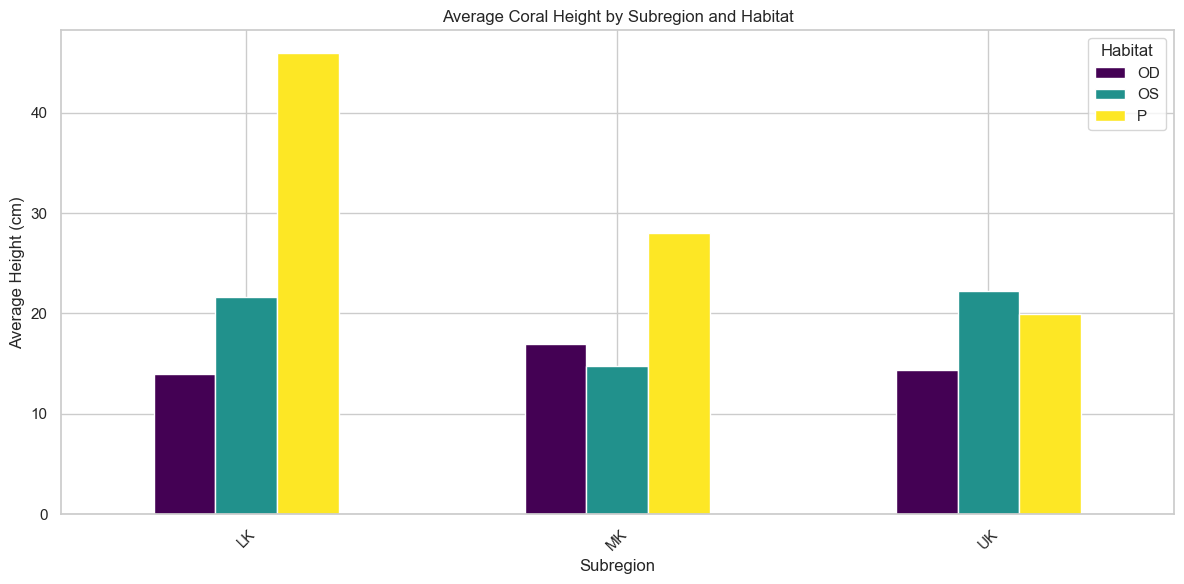

In [37]:
# Habitat + Subregion Combo Analysis
# Average height by combined Habitat and Subregion.

combo = data.groupby(["Subregion", "Habitat"])["Height_cm"].mean().unstack()
combo.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Average Coral Height by Subregion and Habitat")
plt.ylabel("Average Height (cm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

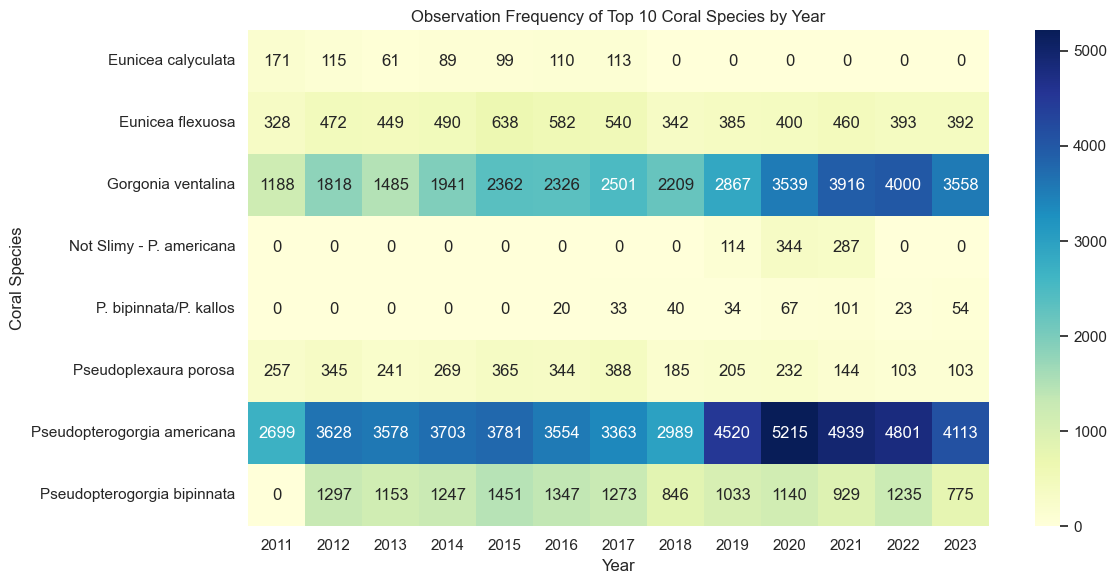

In [39]:
# Top 10 most observed species overall
top_species = data["sciName"].value_counts().head(10).index

# Filter and pivot
heat_data = data[data["sciName"].isin(top_species)]
heatmap_df = heat_data.groupby(["Year", "sciName"]).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df.T, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Observation Frequency of Top 10 Coral Species by Year")
plt.xlabel("Year")
plt.ylabel("Coral Species")
plt.tight_layout()
plt.show()

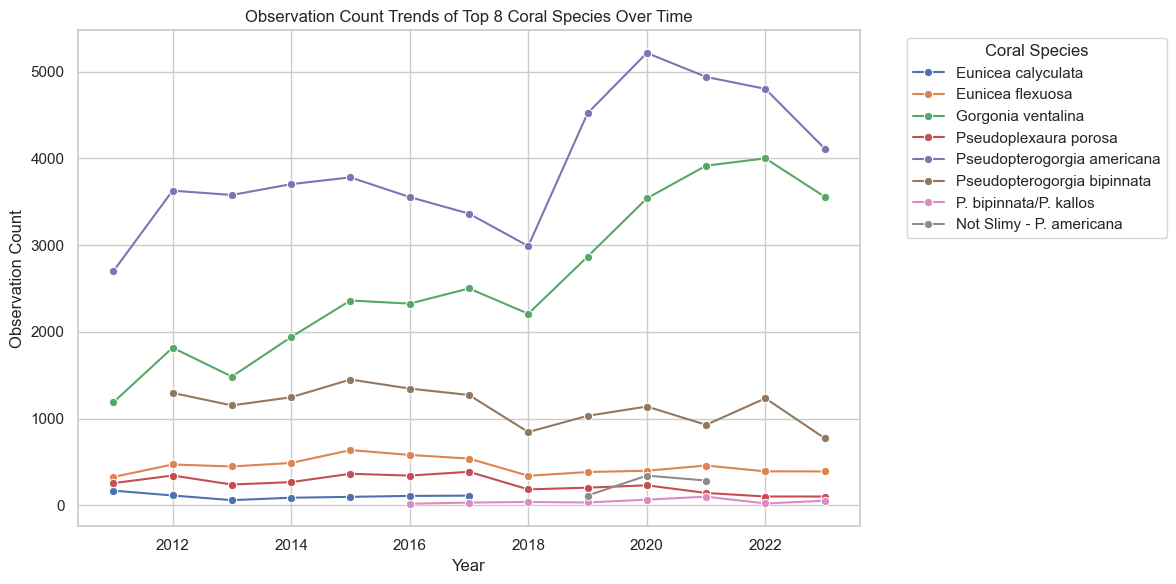

In [41]:
# Top N most observed species overall
top_n = 8
top_species = data["sciName"].value_counts().head(top_n).index
filtered = data[data["sciName"].isin(top_species)]

# Group and plot
species_trend = filtered.groupby(["Year", "sciName"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=species_trend, x="Year", y="count", hue="sciName", marker="o")
plt.title(f"Observation Count Trends of Top {top_n} Coral Species Over Time")
plt.xlabel("Year")
plt.ylabel("Observation Count")
plt.legend(title="Coral Species", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


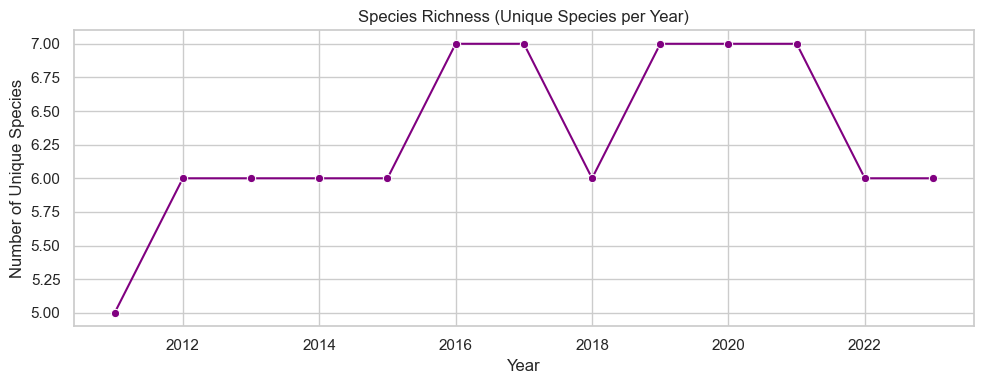

In [23]:
# -----------------------------
# 📈 Bonus: Species Richness Over Time
# -----------------------------
species_richness = data.groupby("Year")["sciName"].nunique()

plt.figure(figsize=(10, 4))
sns.lineplot(x=species_richness.index, y=species_richness.values, marker="o", color="purple")
plt.title("Species Richness (Unique Species per Year)")
plt.xlabel("Year")
plt.ylabel("Number of Unique Species")
plt.tight_layout()
plt.show()

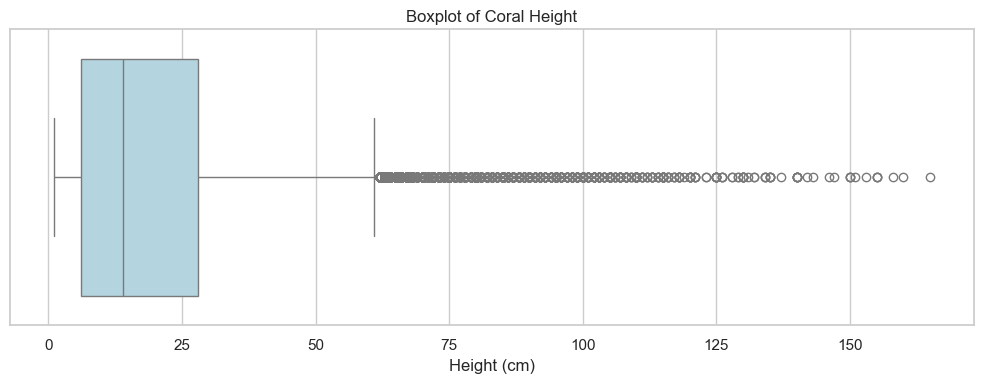

In [25]:
# -----------------------------
# 📦 Optional: Height Outlier Boxplot
# -----------------------------
plt.figure(figsize=(10, 4))
sns.boxplot(data=data, x="Height_cm", color="lightblue")
plt.title("Boxplot of Coral Height")
plt.xlabel("Height (cm)")
plt.tight_layout()
plt.show()